In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat
import seaborn as sns


subreddit = 'all'
filename = f'./data/{subreddit}_submissions_redditapi.csv'


In [2]:
dataframe = pd.read_csv(filename)
authors = dataframe.groupby('author', as_index=False).size()

In [3]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['total num of submissions'] = pd.Series({'value':len(dataframe)})
metadata.loc['deleted submissions'] = pd.Series({'value':len(dataframe.loc[dataframe['self_text'].isin({ "[removed]", "[deleted]"})])})
metadata.loc['deleted author'] = pd.Series({'value':len(dataframe.loc[pd.isna(dataframe['author'])])})
metadata.loc['total num of authors'] = pd.Series({'value':len(authors)})
metadata.loc['avg num of submissions'] = pd.Series({'value':'{:.2f}'.format(authors['size'].mean())})
metadata.loc['median num of submissions'] = pd.Series({'value':authors['size'].median()})

metadata.loc['flesch reading ease score'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.flesch_reading_ease(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average word count'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.lexicon_count(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average num of comments per sub'] = pd.Series({'value':'{:.2f}'.format(dataframe['num_comments'].mean())})
metadata

,value
total num of submissions,8597
deleted submissions,2565
deleted author,2211
total num of authors,5577
avg num of submissions,1.15
median num of submissions,1.0
flesch reading ease score,79.74
average word count,9.60
average num of comments per sub,6.38


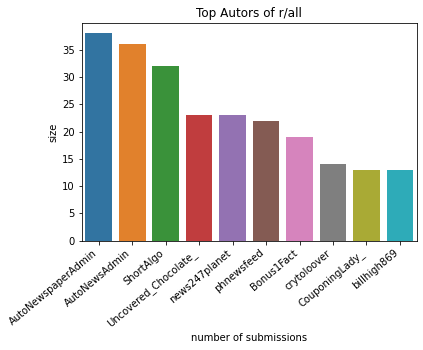

In [4]:
top_authors = authors.nlargest(10, 'size')
ax = sns.barplot(x='author', y='size', data=top_authors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set(xlabel='number of submissions', title=f'Top Autors of r/{subreddit}')
ax.figure.savefig(f'./images/{subreddit}_authors', bbox_inches='tight')


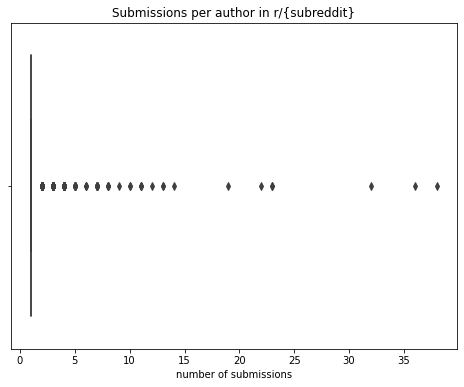

In [5]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=authors['size'])
ax.set(xlabel='number of submissions', title='Submissions per author in r/{subreddit}')
plt.savefig(f'./images/{subreddit}_submissions.png')
plt.show()

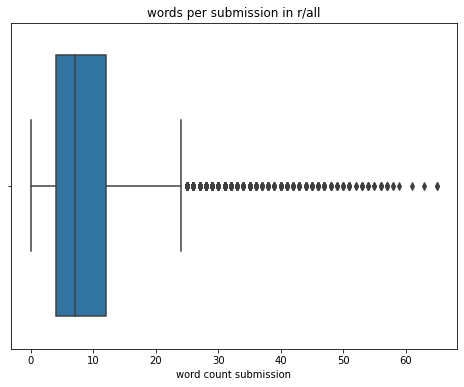

In [6]:
plt.figure(figsize=(8,6))
comment_lengths = [textstat.lexicon_count(str(comment)) for comment in dataframe['title']]
ax = sns.boxplot(x=comment_lengths)
ax.set(xlabel='word count submission', title=f'words per submission in r/{subreddit}')
plt.savefig(f'./images/{subreddit}_words_per_submissions.png')
plt.show()

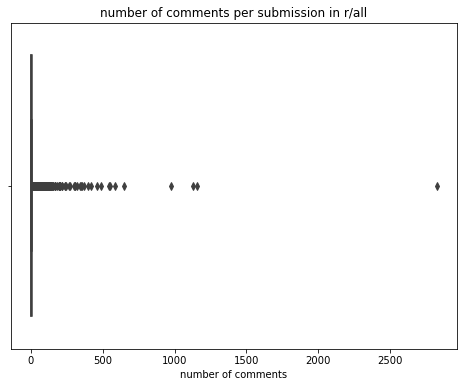

In [7]:
plt.figure(figsize=(8,6))
comment_num = dataframe['num_comments']
ax = sns.boxplot(x=comment_num)
ax.set(xlabel='number of comments', title=f'number of comments per submission in r/{subreddit}')
plt.savefig(f'./images/{subreddit}_num_comments.png')
plt.show()